In [2]:
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import random

from google.colab import drive, files
drive.mount('/content/gdrive/')
path = '/content/gdrive/My Drive/np_arrays/datasets/'
models_path = '/content/gdrive/My Drive/np_arrays/models/'
data_path = '/content/gdrive/My Drive/np_arrays/datasets/'

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 6s 0us/step


In [5]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

50000
10000
50000
10000


In [0]:
def setMaker(index, x_set, y_set):
  for i in range (0, 50000):
    if (y_train[i] == index): #automobile
      x_set.append(x_train[i])
      y_set.append(y_train[i])
    
  for i in range (0, 10000):
     if (y_test[i] == index):
      x_set.append(x_test[i])
      y_set.append(y_test[i])

In [0]:
#Train Matrisi yap #datasetten belli labeldeki şeyleri çekmek
a_tr = []
al_tr = []

b_tr = []
bl_tr = []

c_tr = []
cl_tr = []

d_tr = []
dl_tr = []

e_tr = []
el_tr = []

f_tr = []
fl_tr = []

setMaker(1, a_tr, al_tr) #automobile
setMaker(2, b_tr, bl_tr) #bird
setMaker(3, c_tr, cl_tr) #cat
setMaker(4, d_tr, dl_tr) #deer
setMaker(5, e_tr, el_tr) #dog
setMaker(9, f_tr, fl_tr) #truck

In [0]:
 #Test Matrisi yap #datasetten belli labeldeki şeyleri çekmek
a_ts = []
al_ts = []

setMaker(7, a_ts, al_ts)

In [24]:
print(len(a_tr))
print(len(al_tr))

print(len(b_tr))
print(len(bl_tr))

print(len(c_tr))
print(len(cl_tr))

print(len(d_tr))
print(len(dl_tr))

print(len(e_tr))
print(len(el_tr))

print(len(f_tr))
print(len(fl_tr))

print(len(a_ts))
print(len(al_ts))

print(len(a))
print(len(b))
print(len(g))

print(len(trainset))

6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
36000


In [0]:
def labelAdder(label, setList):
  for i in range (0, 3000):
    label.append(0)
  
  for i in range (3000, 6000):
    label.append(1)
    setList[i] = np.flipud(setList[i])

In [0]:
#Train set ters ve duz olusturma ve label ekleme
a = []
b = []
c = []
d = []
e = []
f = []

labelAdder(a, a_tr)
labelAdder(b, b_tr)
labelAdder(c, c_tr)
labelAdder(d, d_tr)
labelAdder(e, e_tr)
labelAdder(f, f_tr)

In [0]:
#Test set icin ters ve duz olusturma ve label ekleme
g = []

labelAdder(g, a_ts)

In [0]:
def trainCombiner(trainset, trainlabel, traintype, sset, label, ttype):
  for i in range (0, 6000):
    trainset.append(sset[i])
    trainlabel.append(label[i])
    traintype.append(ttype[i])

In [0]:
trainset = []
trainlabel = []
traintype = []

trainCombiner(trainset, trainlabel, traintype, a_tr, a, al_tr)
trainCombiner(trainset, trainlabel, traintype, b_tr, b, bl_tr)
trainCombiner(trainset, trainlabel, traintype, c_tr, c, cl_tr)
trainCombiner(trainset, trainlabel, traintype, d_tr, d, dl_tr)
trainCombiner(trainset, trainlabel, traintype, e_tr, e, el_tr)
trainCombiner(trainset, trainlabel, traintype, f_tr, f, fl_tr)

In [0]:
#Train set icin shuffle islemleri
combined = list(zip(trainset, trainlabel, traintype))
random.shuffle(combined)

trainset[:], trainlabel[:], traintype[:] = zip(*combined)

In [0]:
#Test set icin shuffle islemleri
combined = list(zip(a_ts, g, al_ts))
random.shuffle(combined)

a_ts[:], g[:], al_ts[:] = zip(*combined)

[7]
ters


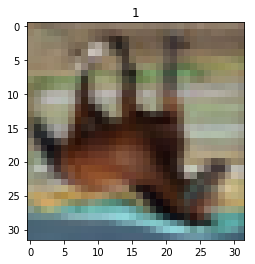

In [23]:
i = 45
rgb = a_ts[i] #Visualize image and label
plt.imshow(rgb)
plt.title(int(g[i]))

print(al_ts[i])

if (g[i] == 1):
  print("ters")
else:
  print("duz")

In [0]:
np.save(data_path + "trainset_horsev1", trainset)
np.save(data_path + "trainlabel_horsev1", trainlabel)
np.save(data_path + "traintype_horsev1", traintype)

np.save(data_path + "testset_horsev1", a_ts)
np.save(data_path + "testlabel_horsev1", g)
np.save(data_path + "testtype_horsev1", al_ts)